[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [49]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [50]:
df = pd.read_csv("../data/diabetes_feature.csv")
df.shape

(768, 16)

In [51]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [52]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [53]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [54]:
y = df['Outcome']
y.shape

(768,)

In [55]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [56]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [57]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

In [58]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

### 최적의 max_depth 값 찾기

In [59]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [60]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [61]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [62]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [63]:
clf.best_score_

0.8664934026389444

In [64]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.003000,3.504023e-07,0.001001,4.672031e-07,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.002600,4.903108e-04,0.001400,4.892787e-04,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.003201,4.009248e-04,0.001200,3.994002e-04,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.003200,3.999715e-04,0.000600,4.897457e-04,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.003001,5.560829e-07,0.001800,4.006864e-04,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [65]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [66]:
clf.score(X_test, y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [67]:
model

DecisionTreeClassifier(random_state=42)

In [68]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 9,  4, 13,  6, 13, 13, 16, 14,  5, 10])

In [69]:
max_features = np.random.uniform(0.4, 1.0, 100)
max_features

array([0.67866195, 0.66386524, 0.93469832, 0.71452196, 0.8702015 ,
       0.52578409, 0.90839363, 0.50948765, 0.73751467, 0.76521652,
       0.54901822, 0.54897001, 0.515108  , 0.57919848, 0.65125775,
       0.45746536, 0.56425008, 0.95634412, 0.93498182, 0.61272979,
       0.98357989, 0.96851127, 0.82653439, 0.93464363, 0.88771467,
       0.69133373, 0.55195297, 0.81425767, 0.52038841, 0.92470549,
       0.61136641, 0.5420752 , 0.98871113, 0.47611519, 0.53359369,
       0.42671437, 0.99234055, 0.75018774, 0.92498958, 0.6738465 ,
       0.54447679, 0.98515308, 0.45799903, 0.93146136, 0.80219838,
       0.79015945, 0.58982615, 0.87658697, 0.62063417, 0.80120091,
       0.92627986, 0.51645918, 0.85747678, 0.42387444, 0.90183583,
       0.4337899 , 0.9342145 , 0.7172392 , 0.73103609, 0.87810765,
       0.84821125, 0.92535346, 0.76489672, 0.73546356, 0.46501308,
       0.98785623, 0.61254663, 0.54008032, 0.61805233, 0.42014705,
       0.58161342, 0.73357371, 0.62986785, 0.97058034, 0.72183

In [70]:
param_distributions = {"max_depth" :max_depth, 
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([ 9,  4, 13,  6, 13, 13, 16, 14,  5, 10]),
 'max_features': array([0.67866195, 0.66386524, 0.93469832, 0.71452196, 0.8702015 ,
        0.52578409, 0.90839363, 0.50948765, 0.73751467, 0.76521652,
        0.54901822, 0.54897001, 0.515108  , 0.57919848, 0.65125775,
        0.45746536, 0.56425008, 0.95634412, 0.93498182, 0.61272979,
        0.98357989, 0.96851127, 0.82653439, 0.93464363, 0.88771467,
        0.69133373, 0.55195297, 0.81425767, 0.52038841, 0.92470549,
        0.61136641, 0.5420752 , 0.98871113, 0.47611519, 0.53359369,
        0.42671437, 0.99234055, 0.75018774, 0.92498958, 0.6738465 ,
        0.54447679, 0.98515308, 0.45799903, 0.93146136, 0.80219838,
        0.79015945, 0.58982615, 0.87658697, 0.62063417, 0.80120091,
        0.92627986, 0.51645918, 0.85747678, 0.42387444, 0.90183583,
        0.4337899 , 0.9342145 , 0.7172392 , 0.73103609, 0.87810765,
        0.84821125, 0.92535346, 0.76489672, 0.73546356, 0.46501308,
        0.98785623, 0.61254663, 0.540

In [71]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 9,  4, 13,  6, 13, 13, 16, 14,  5, 10]),
                                        'max_features': array([0.67866195, 0.66386524, 0.93469832, 0.71452196, 0.8702015 ,
       0.52578409, 0.90839363, 0.50948765, 0.73751467, 0.76521652,
       0.54901822, 0.54897001, 0.515108  , 0.57919848, 0.65125775,
       0....
       0.58161342, 0.73357371, 0.62986785, 0.97058034, 0.72183811,
       0.70452254, 0.90180079, 0.75829404, 0.40691812, 0.80644926,
       0.44637395, 0.94072993, 0.79456893, 0.90816557, 0.42378815,
       0.79206609, 0.6277251 , 0.72618267, 0.69029935, 0.62959096,
       0.64672346, 0.49340578, 0.63929991, 0.73176779, 0.64510747,
       0.60846218, 0.43242779, 0.92432694, 0.61245369, 0.60653189]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_

In [72]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.8781076513065018, 'max_depth': 10}

In [73]:
clf.best_score_

0.8713847794215648

In [74]:
clf.score(X_test, y_test)

0.8571428571428571

In [75]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
88,0.003200,4.001625e-04,0.001401,0.000490,4,0.878108,10,"{'min_samples_split': 4, 'max_features': 0.878...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
739,0.004201,7.480097e-04,0.001801,0.000748,6,0.901836,9,"{'min_samples_split': 6, 'max_features': 0.901...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
269,0.003401,4.893957e-04,0.001600,0.000490,6,0.924705,9,"{'min_samples_split': 6, 'max_features': 0.924...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
377,0.004001,7.776979e-07,0.001200,0.000401,6,0.92628,9,"{'min_samples_split': 6, 'max_features': 0.926...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
318,0.002601,4.899989e-04,0.001200,0.000400,4,0.848211,10,"{'min_samples_split': 4, 'max_features': 0.848...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1


## 학습과 예측하기

In [76]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
feature_names = X_train.columns.tolist()

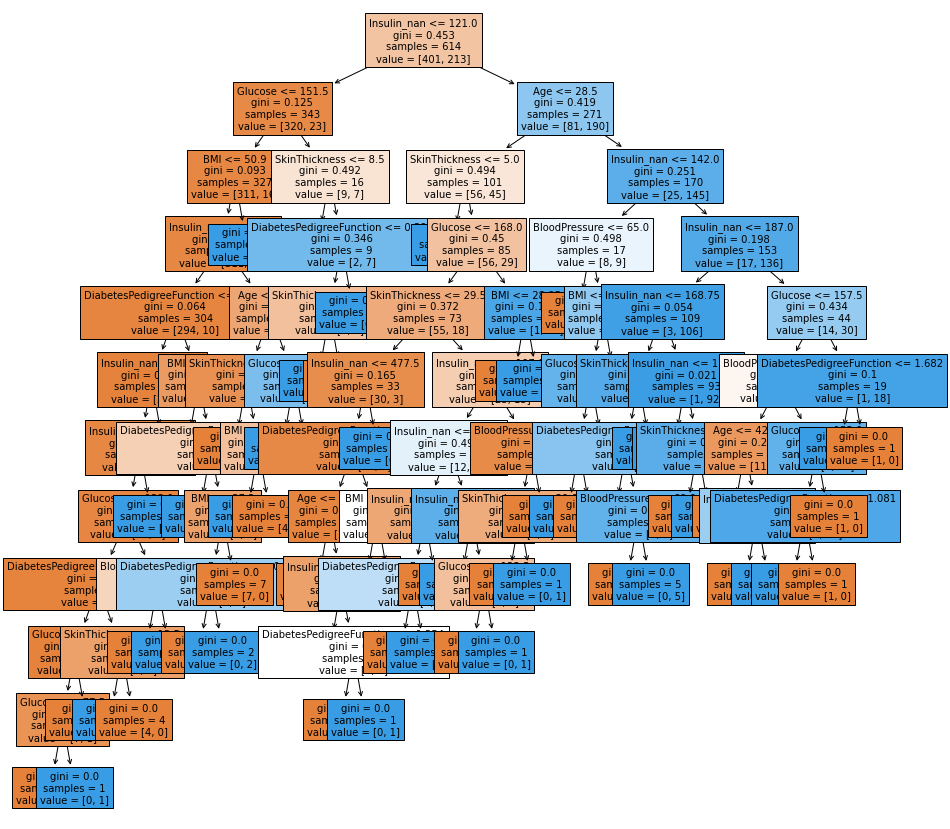

In [78]:
from sklearn.tree import plot_tree


plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [79]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

## 정확도(Accuracy) 측정하기

In [80]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()

28

In [81]:
# accuracy score를 구합니다.

accuracy_score(y_test, y_predict) * 100

81.81818181818183